In [1]:
import numpy as np
import pandas as pd

In [2]:
#from google.colab import drive
#drive.mount("/content/drive")

In [3]:
#DATA_PATH = "/content/drive/MyDrive/data/"

In [4]:
import os

DATA_PATH=os.getcwd()


df = pd.read_csv(f"{DATA_PATH}\\data\\titanic_train.csv")
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        210 non-null    object 
 11  embarked     916 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


# 결측치 다루기

In [6]:
df.isnull()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
911,False,False,False,False,False,False,False,False,False,False,False,False
912,False,False,False,False,False,True,False,False,False,False,True,False
913,False,False,False,False,False,False,False,False,False,False,True,False
914,False,False,False,False,False,False,False,False,False,False,True,False


## 결측치 확인

- 컬럼별로 결측치 개수 확인하기

In [7]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          706
embarked         0
dtype: int64

In [8]:
type(df.isnull().sum())

pandas.core.series.Series

- 시리즈에 인덱스 부분만 가져오고 싶다면?

In [9]:
df.isnull().sum().index

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

- 시리즈에 값들만 가져오고 싶다면?

In [10]:
df.isnull().sum().values

array([  0,   0,   0,   0,   0, 180,   0,   0,   0,   0, 706,   0],
      dtype=int64)

# 'column_name' 컬럼의 누락된 값 개수 조회
missing_values_count = df.isnull().sum()['column_name']


In [11]:
df.values

array([[494, 0, 1, ..., 49.5042, nan, 'C'],
       [462, 0, 3, ..., 8.05, nan, 'S'],
       [1286, 0, 3, ..., 22.025, nan, 'S'],
       ...,
       [664, 0, 3, ..., 7.4958, nan, 'S'],
       [109, 0, 3, ..., 7.8958, nan, 'S'],
       [146, 0, 2, ..., 36.75, nan, 'S']], dtype=object)

In [12]:
df.to_numpy()

array([[494, 0, 1, ..., 49.5042, nan, 'C'],
       [462, 0, 3, ..., 8.05, nan, 'S'],
       [1286, 0, 3, ..., 22.025, nan, 'S'],
       ...,
       [664, 0, 3, ..., 7.4958, nan, 'S'],
       [109, 0, 3, ..., 7.8958, nan, 'S'],
       [146, 0, 2, ..., 36.75, nan, 'S']], dtype=object)

- 결측치 제거

In [13]:
df.dropna() # 기본값: how="any"

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S
9,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
22,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
26,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
35,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
...,...,...,...,...,...,...,...,...,...,...,...,...
892,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
899,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
901,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
907,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S


In [14]:
df.dropna(how="all") # 샘플의 모든 값이 결측치 인경우 제거

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
912,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
913,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
914,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S


## 결측치 채우기

In [15]:
data = {'a': 10, 'b': 20, 'c': 30}
ser = pd.Series(data)
ser

a    10
b    20
c    30
dtype: int64

In [16]:
import pandas as pd

# 주어진 Series
s = pd.Series({'a': 10, 'b': 20, 'c': 30})

# Series를 데이터프레임으로 변환
df = pd.DataFrame(s)

df


,0
a,10
b,20
c,30


In [17]:

df = pd.read_csv(f"{DATA_PATH}\\data\\titanic_train.csv")
df.head()

type(df.isnull().sum())

pandas.core.series.Series

In [18]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          706
embarked         0
dtype: int64

df.isnull().sum()[df.isnull().sum() > 0]

In [19]:
df.isnull().sum()[df.isnull().sum() > 0]

age      180
cabin    706
dtype: int64

In [20]:
df.isnull().sum()['age']

180

- 범주형 데이터의 결측치는 일반적으로 최빈값으로 처리

In [21]:
df["cabin"].mode()

0    B57 B59 B63 B66
1                 G6
Name: cabin, dtype: object

In [23]:
df["cabin"].mode()

0    B57 B59 B63 B66
1                 G6
Name: cabin, dtype: object

In [22]:
fill_value = df["cabin"].mode()[0]
fill_value,df["cabin"].fillna(fill_value)

('B57 B59 B63 B66',
 0      B57 B59 B63 B66
 1      B57 B59 B63 B66
 2      B57 B59 B63 B66
 3      B57 B59 B63 B66
 4                  E12
             ...       
 911               B101
 912    B57 B59 B63 B66
 913    B57 B59 B63 B66
 914    B57 B59 B63 B66
 915    B57 B59 B63 B66
 Name: cabin, Length: 916, dtype: object)

- 범주형 데이터 결측치 처리시 예를들어 "UNK" 라는 새로운 범주를 만들어서 채우기도 한다.

In [24]:
df["cabin"] = df["cabin"].fillna("UNK")

- 수치형 데이터는 평균, 중앙값, 예를들어 0 또는 -1 등과 같은 상수값으로 처리한다.

In [25]:
df["age"].skew()

0.45286967436496056

In [26]:
fill_value = df["age"].mean()
df["age"] = df["age"].fillna(fill_value)

In [27]:
df.isnull().sum().sum()

0

# 특정값들 포함여부

- S 와 C 항구 승객들만 보기

In [28]:
mask = df["embarked"].isin(["S","C"])
df.loc[mask]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,UNK,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,UNK,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,UNK,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,UNK,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
910,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,UNK,S
911,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
913,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,UNK,S
914,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,UNK,S


# 타입 변환(type casting)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          916 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        916 non-null    object 
 11  embarked     916 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [30]:
df["age"] = df["age"].astype("int32") # object

In [33]:
df["pclass"].astype("object")

0      1
1      3
2      3
3      2
4      1
      ..
911    1
912    3
913    3
914    3
915    2
Name: pclass, Length: 916, dtype: object

In [34]:
df["pclass"].astype("category")

0      1
1      3
2      3
3      2
4      1
      ..
911    1
912    3
913    3
914    3
915    2
Name: pclass, Length: 916, dtype: category
Categories (3, int64): [1, 2, 3]

# 문자열 다루기
- object 타입의 series의 str 속성을 사용하여 다양한 문자열 관련 메서드를 사용할 수 있다.

In [35]:
df["ticket"].str.strip() # 앞뒤 공백 제거

0        PC 17609
1          364506
2          315153
3          250650
4           19952
          ...    
911      PC 17755
912        371110
913        349210
914        349249
915    C.A. 33112
Name: ticket, Length: 916, dtype: object

In [36]:
df["ticket"].str.replace(" ", "-")

0        PC-17609
1          364506
2          315153
3          250650
4           19952
          ...    
911      PC-17755
912        371110
913        349210
914        349249
915    C.A.-33112
Name: ticket, Length: 916, dtype: object

In [37]:
df["ticket"].str.replace("[ .]+", "_", regex=True)

0       PC_17609
1         364506
2         315153
3         250650
4          19952
         ...    
911     PC_17755
912       371110
913       349210
914       349249
915    C_A_33112
Name: ticket, Length: 916, dtype: object

In [38]:
df["ticket"].str.split() # 기본값이 띄어쓰기 기준

0        [PC, 17609]
1           [364506]
2           [315153]
3           [250650]
4            [19952]
           ...      
911      [PC, 17755]
912         [371110]
913         [349210]
914         [349249]
915    [C.A., 33112]
Name: ticket, Length: 916, dtype: object

In [39]:
df["ticket"].str.split(",")

0        [PC 17609]
1          [364506]
2          [315153]
3          [250650]
4           [19952]
           ...     
911      [PC 17755]
912        [371110]
913        [349210]
914        [349249]
915    [C.A. 33112]
Name: ticket, Length: 916, dtype: object

df['ticket'].str.split(',| ', expand=True)


In [40]:
df["ticket"].str.split(expand=True)

,0,1,2
0,PC,17609,None
1,364506,None,None
2,315153,None,None
3,250650,None,None
4,19952,None,None
...,...,...,...
911,PC,17755,None
912,371110,None,None
913,349210,None,None
914,349249,None,None


In [41]:
df["name"].str.len()

0      23
1      19
2      24
3      21
4      19
       ..
911    22
912    17
913    16
914    15
915    28
Name: name, Length: 916, dtype: int64

In [42]:
df["name"].str[:10]

0      Artagaveyt
1      Morley, Mr
2      Kink-Heilm
3      Hiltunen, 
4      Anderson, 
          ...    
911    Lesurer, M
912    Ryan, Mr. 
913    Coleff, Mr
914    Rekic, Mr.
915    Nicholls, 
Name: name, Length: 916, dtype: object

In [43]:
df["name"].str.lower() # 소문자 변환,   대문자 변환은 upper()

0           artagaveytia, mr. ramon
1               morley, mr. william
2          kink-heilmann, mr. anton
3             hiltunen, miss. marta
4               anderson, mr. harry
                   ...             
911          lesurer, mr. gustave j
912               ryan, mr. patrick
913                coleff, mr. peju
914                 rekic, mr. tido
915    nicholls, mr. joseph charles
Name: name, Length: 916, dtype: object

In [44]:
df["gender"].str.startswith("fe")

0      False
1      False
2      False
3       True
4      False
       ...  
911    False
912    False
913    False
914    False
915    False
Name: gender, Length: 916, dtype: bool

In [45]:
df["gender"].str.endswith("fe")

0      False
1      False
2      False
3      False
4      False
       ...  
911    False
912    False
913    False
914    False
915    False
Name: gender, Length: 916, dtype: bool

import pandas as pd

# 예제 DataFrame 생성
df = pd.DataFrame({'column_name': ['단일가격', '다른값', '또다른값']})

# '단'이 포함된 행이 있는지 전체에 대해서 확인
contains_word = df['column_name'].str.contains('단').any()

print(contains_word)  # True가 출력되면 '단'이 하나라도 포함된 행이 존재함을 의미
Result
True

# 모든 값의 리스트를 반환
result = df['column_name'].str.contains('단')

In [46]:
df["name"].str.contains("Mr.")

0       True
1       True
2       True
3      False
4       True
       ...  
911     True
912     True
913     True
914     True
915     True
Name: name, Length: 916, dtype: bool

# pivot_table 사용해보기
- 데이터에서 우리가 지정한 컬럼들을 기준으로 그룹화 하여 집계한 후에 표 형태로 작성해주는 기능
- 주요 파라미터
    - index: 행으로 사용할 컬럼명
    - columns: 열로 사용할 컬럼명
    - values: 집계 대상이 되는 컬럼명
    - aggfunc: 집계함수
        - 콜백함수나 집계 문자열 전달
        - ("std", "var", "mean", "sum","max","min","median" ... 등)

In [47]:
df["age_range"] = df["age"] // 10
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4


- 나이대별로 운임료의 평균을 집계

In [48]:
tmp = pd.pivot_table(
    df,
    index = "age_range",
    values = "fare",
    aggfunc = "mean"
)
tmp

,fare
age_range,
0,28.211456
1,32.475827
2,24.482141
3,43.471821
4,44.526043
5,66.987500
6,70.308829
7,35.706680
8,30.000000


In [49]:
tmp.reset_index()

,age_range,fare
0,0,28.211456
1,1,32.475827
2,2,24.482141
3,3,43.471821
4,4,44.526043
5,5,66.987500
6,6,70.308829
7,7,35.706680
8,8,30.000000


- 각 나이대에서 pclass 별로 생존률 알고 싶다면??
    

In [50]:
tmp = pd.pivot_table(
    df,
    index = "age_range",
    columns= "pclass",
    values="survived",
    aggfunc = "mean"
)
tmp

pclass,1,2,3
age_range,,,
0,0.500000,0.882353,0.484848
1,0.777778,0.434783,0.261538
2,0.587302,0.389610,0.241379
3,0.632653,0.404762,0.276923
4,0.545455,0.421053,0.172414
5,0.538462,0.230769,0.000000
6,0.454545,0.250000,0.500000
7,0.333333,NaN,0.000000
8,1.000000,NaN,NaN


In [51]:
tmp.reset_index()

pclass,age_range,1,2,3
0,0,0.500000,0.882353,0.484848
1,1,0.777778,0.434783,0.261538
2,2,0.587302,0.389610,0.241379
3,3,0.632653,0.404762,0.276923
4,4,0.545455,0.421053,0.172414
5,5,0.538462,0.230769,0.000000
6,6,0.454545,0.250000,0.500000
7,7,0.333333,NaN,0.000000
8,8,1.000000,NaN,NaN


- 각 나이대에서 pclass 별 fare에 대한 표준편차와 평균을 알고 싶다면?

In [52]:
tmp = pd.pivot_table(
    df,
    index = "age_range",
    columns= "pclass",
    values="fare",
    aggfunc = ["std", "mean"]
)
tmp

std                              mean                      
pclass              1          2          3           1          2          3
age_range                                                                    
0           37.223303   8.254788  10.341828  108.179150  28.965200  22.976636
1           79.118157  21.087603  12.508800  106.923611  24.478261  14.689426
2           63.813516  13.696544  12.429336   84.093717  20.479003  12.594942
3          118.634378  11.294378  10.061673  105.133082  19.569245  12.433457
4           68.644435  13.011986  11.477838   73.824059  22.223684  14.685772
5           89.446643   6.699017   0.459114   91.429700  16.490385   7.630840
6           89.884318   8.448706   1.299309  100.278418  18.712500   8.668750
7           22.490617        NaN   0.017678   54.336133        NaN   7.762500
8                 NaN        NaN        NaN   30.000000        NaN        NaN

In [53]:
tmp.columns

MultiIndex([( 'std', 1),
            ( 'std', 2),
            ( 'std', 3),
            ('mean', 1),
            ('mean', 2),
            ('mean', 3)],
           names=[None, 'pclass'])

In [54]:
tmp.columns = [ f"{col1}_{col2}" for col1, col2  in tmp.columns ]

In [55]:
tmp.reset_index()

,age_range,std_1,std_2,std_3,mean_1,mean_2,mean_3
0,0,37.223303,8.254788,10.341828,108.179150,28.965200,22.976636
1,1,79.118157,21.087603,12.508800,106.923611,24.478261,14.689426
2,2,63.813516,13.696544,12.429336,84.093717,20.479003,12.594942
3,3,118.634378,11.294378,10.061673,105.133082,19.569245,12.433457
4,4,68.644435,13.011986,11.477838,73.824059,22.223684,14.685772
5,5,89.446643,6.699017,0.459114,91.429700,16.490385,7.630840
6,6,89.884318,8.448706,1.299309,100.278418,18.712500,8.668750
7,7,22.490617,NaN,0.017678,54.336133,NaN,7.762500
8,8,NaN,NaN,NaN,30.000000,NaN,NaN


- 나이대별 pclass의 최빈값을 보고 싶다면?

In [56]:
pd.pivot_table(
    df,
    index = "age_range",
    values = "pclass",
    aggfunc = lambda x: x.mode()[0]
)

,pclass
age_range,
0,3
1,3
2,3
3,3
4,1
5,1
6,1
7,1
8,1


# groupby 사용해보기
- 데이터를 그룹화하여 집계해서 가공하는데 아주 많이 쓴다.

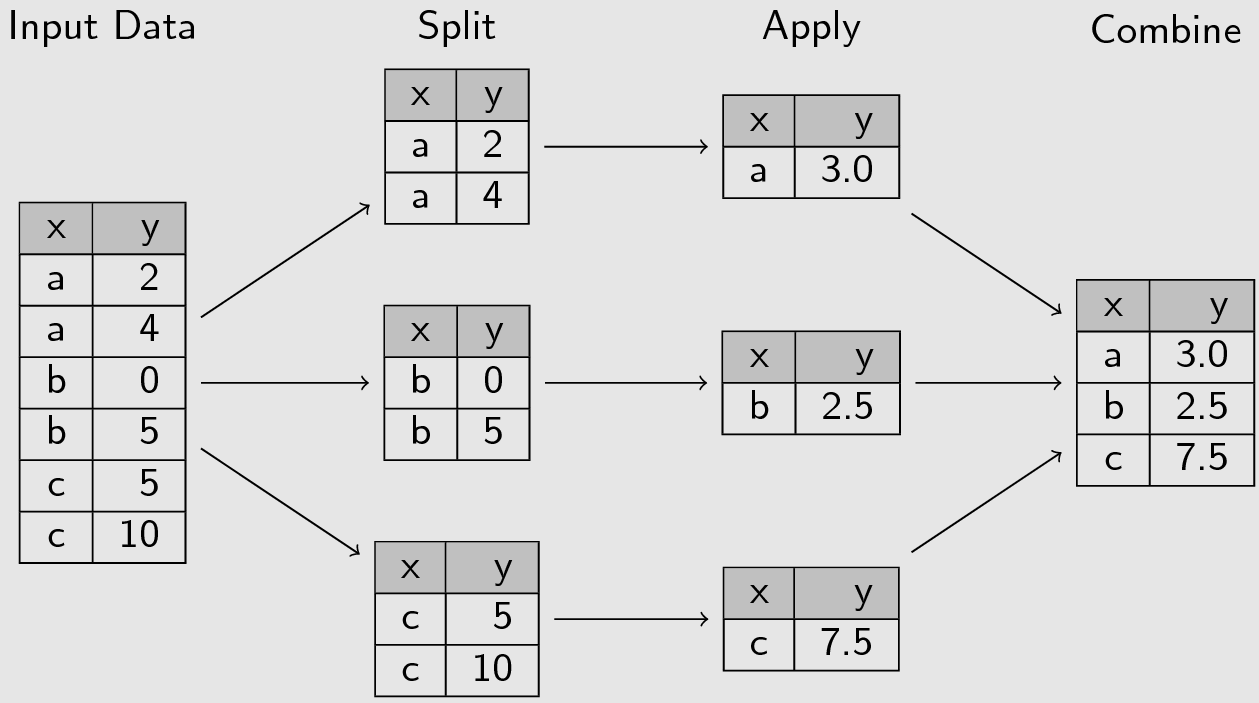

```python
# 그룹핑 대상 컬럼명은 문자열 또는 리스트 전달

DataFrame.groupby(<그룹핑 대상 컬럼명>)["집계대상컬럼명"].<집계메서드>()
```

## groupby 결과에 대한 단일 컬럼을 지정하여 집계하는 예시

In [57]:
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4


- 탑승항구별 생존률

In [58]:
df.groupby("embarked"),df.groupby("embarked")[["survived"]].mean()

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001954A5E91C0>,
           survived
 embarked          
 C         0.462366
 Q         0.392857
 S         0.351393)

In [59]:
df.groupby("embarked")[["survived"]].mean() # max, min, sum, median, std, var 등 메서드 모두 가능

,survived
embarked,
C,0.462366
Q,0.392857
S,0.351393


- 탑승항구별 운임료의 표준편차 집계

In [62]:
df.groupby("embarked")["fare"]

In [60]:
df.groupby("embarked")["fare"].agg("std")

embarked
C    94.235132
Q     6.592466
S    34.958663
Name: fare, dtype: float64

In [61]:
df.groupby("embarked")["survived"].agg("mean")

embarked
C    0.462366
Q    0.392857
S    0.351393
Name: survived, dtype: float64

In [63]:
df.groupby("embarked")["survived"].agg(lambda x : x.mean())

embarked
C    0.462366
Q    0.392857
S    0.351393
Name: survived, dtype: float64

In [64]:
df.groupby("embarked")["fare"].agg(lambda x : x.mean())

embarked
C    68.672270
Q    11.160073
S    27.594948
Name: fare, dtype: float64

- 나이대별 parch 의 평균과 최대값을 집계

In [65]:
df.groupby("age_range")["parch"].agg(["mean","max"]).reset_index()

,age_range,mean,max
0,0,1.346154,2
1,1,0.490566,3
2,2,0.241860,9
3,3,0.320513,5
4,4,0.521739,6
5,5,0.263158,1
6,6,0.294118,3
7,7,0.000000,0
8,8,0.000000,0


- 나이대별 parch 의 평균과 최대값을 집계(컬럼명을 만들면서)

In [66]:
agg_list = [
        # 컬럼명, 집계방식
        ("parch_mean","mean"),
        ("parch_max","max")
    ]

df.groupby("age_range")["parch"].agg(agg_list)

,parch_mean,parch_max
age_range,,
0,1.346154,2
1,0.490566,3
2,0.241860,9
3,0.320513,5
4,0.521739,6
5,0.263158,1
6,0.294118,3
7,0.000000,0
8,0.000000,0


In [67]:
df.groupby("age_range")[["parch"]].agg([max,min])

C:\Users\hopio\AppData\Local\Temp\ipykernel_162260\2446536258.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby("age_range")[["parch"]].agg([max,min])
C:\Users\hopio\AppData\Local\Temp\ipykernel_162260\2446536258.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby("age_range")[["parch"]].agg([max,min])


parch    
            max min
age_range          
0             2   1
1             3   0
2             9   0
3             5   0
4             6   0
5             1   0
6             3   0
7             0   0
8             0   0

## groupby 결과에 대한 딕셔너리를 이용하여 집계하는 예시

```python
DataFrame.groupby(<그룹핑대상컬럼명>).agg(<딕셔너리>)
```

- 딕셔너리 예시
```python
{
    "집계대상컬럼명": <콜백함수 or 문자열>
}
```

- 나이대별 운임료의 평균

In [68]:
agg_list = [
        # 컬럼명, 집계방식
        ("parch_mean","mean"),
        ("parch_max","max")
    ]

df.groupby("age_range")["parch"].agg(agg_list)

,parch_mean,parch_max
age_range,,
0,1.346154,2
1,0.490566,3
2,0.241860,9
3,0.320513,5
4,0.521739,6
5,0.263158,1
6,0.294118,3
7,0.000000,0
8,0.000000,0


In [69]:
agg_dict = {
    "fare": "mean"
}

df.groupby("age_range").agg(agg_dict)

,fare
age_range,
0,28.211456
1,32.475827
2,24.482141
3,43.471821
4,44.526043
5,66.987500
6,70.308829
7,35.706680
8,30.000000


- 각 나이대에서 pclass 별 생존률

In [70]:
cols = ["age_range", "pclass"] # 그룹핑 대상 컬럼
agg_dict = {"survived": "mean"} # 집계 대상 컬럼명 및 집계 함수
df.groupby(cols).agg(agg_dict)

survived
age_range pclass          
0         1       0.500000
          2       0.882353
          3       0.484848
1         1       0.777778
          2       0.434783
          3       0.261538
2         1       0.587302
          2       0.389610
          3       0.241379
3         1       0.632653
          2       0.404762
          3       0.276923
4         1       0.545455
          2       0.421053
          3       0.172414
5         1       0.538462
          2       0.230769
          3       0.000000
6         1       0.454545
          2       0.250000
          3       0.500000
7         1       0.333333
          3       0.000000
8         1       1.000000

In [71]:
cols = ["age_range", "pclass"] # 그룹핑 대상 컬럼
df.groupby(cols)["survived"].agg(["mean"])

mean
age_range pclass          
0         1       0.500000
          2       0.882353
          3       0.484848
1         1       0.777778
          2       0.434783
          3       0.261538
2         1       0.587302
          2       0.389610
          3       0.241379
3         1       0.632653
          2       0.404762
          3       0.276923
4         1       0.545455
          2       0.421053
          3       0.172414
5         1       0.538462
          2       0.230769
          3       0.000000
6         1       0.454545
          2       0.250000
          3       0.500000
7         1       0.333333
          3       0.000000
8         1       1.000000

## 다양한 컬럼들에 대하여 집계하고 싶다면?

- 나이대별 생존률과, 객실번호의 다양성

In [72]:
agg_dict = {
    "survived": "mean", # 생존률
    "cabin" : "nunique" # 객실번호의 다양성
}
df.groupby("age_range").agg(agg_dict)

,survived,cabin
age_range,,
0,0.615385,7
1,0.386792,17
2,0.318605,46
3,0.423077,43
4,0.402174,32
5,0.421053,29
6,0.411765,9
7,0.200000,3
8,1.000000,1


- 탑승항구별 운임료의 평균과 표준편차, 객실번호의 다양성, 최빈값

In [73]:
agg_dict = {
    "fare": [("fare_mean","mean"), ("fare_std","std")],
    "cabin" : [("cabin_number","nunique"), lambda x: x.mode()[0] ]
}
col_list=["embarked","age_range"]
tmp = df.groupby(col_list).agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp

fare_mean    fare_std  cabin_number  \
embarked age_range                                         
C        0           33.107080   37.199162             2   
         1           69.865947   93.580528             5   
         2           38.930589   52.061873            19   
         3          110.677503  149.840480            20   
         4           99.835532   82.253814            13   
         5          114.099779  118.335105            15   
         6          118.973975   95.822442             4   
         7           42.079200   10.500536             2   
Q        0           29.125000    0.000000             1   
         1           11.186117    8.798669             1   
         2           10.039696    4.925434             1   
         3           10.737882    6.637563             1   
         4           11.625000    5.480078             1   
         5           12.350000         NaN             1   
         6           10.050000    3.252691             1   
         7            7.750000         NaN             1   
S        0           26.826971   13.588681             6   
         1           26.356625   30.824574            13   
         2           23.076242   33.298660            28   
         3           29.070976   34.729346            25   
         4           30.651703   35.178781            20   
         5           44.271397   41.607835            15   
         6           63.568564   80.214597             5   
         7           43.312500   50.257614             2   
         8           30.000000         NaN             1   

                   functools.partial(<function <lambda> at 0x0000019547DA3C40>)  
embarked age_range                                                               
C        0                                                        UNK            
         1                                                        UNK            
         2                                                        UNK            
         3                                                        UNK            
         4                                                        UNK            
         5                                                        UNK            
         6                                                        B30            
         7                                                         A5            
Q        0                                                        UNK            
         1                                                        UNK            
         2                                                        UNK            
         3                                                        UNK            
         4                                                        UNK            
         5                                                        UNK            
         6                                                        UNK            
         7                                                        UNK            
S        0                                                        UNK            
         1                                                        UNK            
         2                                                        UNK            
         3                                                        UNK            
         4                                                        UNK            
         5                                                        UNK            
         6                                                        UNK            
         7                                                        C46            
         8                                                        A23


tmp.columns의 값은 다음과 같은 MultiIndex 구조를 가지고 있습니다:

('fare', 'fare_mean')
('fare', 'fare_std')
('cabin', 'cabin_number')
('cabin', 'cabin_mode')
여기서 각 열 이름은 두 부분으로 구성되어 있습니다. 첫 번째 부분은 원래 컬럼 이름('fare' 또는 'cabin')이고, 두 번째 부분은 집계 함수의 이름('fare_mean', 'fare_std', 'cabin_number', 'cabin_mode')입니다.

tmp.columns.droplevel()을 사용하면 이 MultiIndex의 첫 번째 레벨(원래 컬럼 이름)이 제거되고, 두 번째 레벨(집계 함수 이름)만 남게 됩니다

In [74]:
agg_dict = {
    "fare": [("fare_mean", "mean"), ("fare_std", "std")],
    "cabin": [("cabin_number", "nunique"), ("cabin_mode", lambda x: x.mode().iat[0])]
}
col_list = ["embarked", "age_range"]

# 그룹화 및 집계 수행
tmp = df.groupby(col_list).agg(agg_dict)

# 열 이름 정리
tmp.columns = tmp.columns.droplevel()

# 결과 출력
print(tmp)


                     fare_mean    fare_std  cabin_number cabin_mode
embarked age_range                                                 
C        0           33.107080   37.199162             2        UNK
         1           69.865947   93.580528             5        UNK
         2           38.930589   52.061873            19        UNK
         3          110.677503  149.840480            20        UNK
         4           99.835532   82.253814            13        UNK
         5          114.099779  118.335105            15        UNK
         6          118.973975   95.822442             4        B30
         7           42.079200   10.500536             2         A5
Q        0           29.125000    0.000000             1        UNK
         1           11.186117    8.798669             1        UNK
         2           10.039696    4.925434             1        UNK
         3           10.737882    6.637563             1        UNK
         4           11.625000    5.480078      

In [75]:
agg_dict = {
    "fare": ["mean", "std"],
    "cabin" : ["nunique", lambda x: x.mode()[0] ]
}
tmp = df.groupby("embarked").agg(agg_dict)
tmp

fare              cabin           
               mean        std nunique <lambda_0>
embarked                                         
C         68.672270  94.235132      63        UNK
Q         11.160073   6.592466       1        UNK
S         27.594948  34.958663      86        UNK

- 집계 컬럼명 정의해주기

In [76]:
agg_dict = {
    "fare": [("fare_mean","mean"), ("fare_std","std")],
    "cabin" : [("cabin_number","nunique"), lambda x: x.mode()[0] ]
}
col_list=["embarked","age_range"]
tmp = df.groupby(col_list).agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp

fare_mean    fare_std  cabin_number  \
embarked age_range                                         
C        0           33.107080   37.199162             2   
         1           69.865947   93.580528             5   
         2           38.930589   52.061873            19   
         3          110.677503  149.840480            20   
         4           99.835532   82.253814            13   
         5          114.099779  118.335105            15   
         6          118.973975   95.822442             4   
         7           42.079200   10.500536             2   
Q        0           29.125000    0.000000             1   
         1           11.186117    8.798669             1   
         2           10.039696    4.925434             1   
         3           10.737882    6.637563             1   
         4           11.625000    5.480078             1   
         5           12.350000         NaN             1   
         6           10.050000    3.252691             1   
         7            7.750000         NaN             1   
S        0           26.826971   13.588681             6   
         1           26.356625   30.824574            13   
         2           23.076242   33.298660            28   
         3           29.070976   34.729346            25   
         4           30.651703   35.178781            20   
         5           44.271397   41.607835            15   
         6           63.568564   80.214597             5   
         7           43.312500   50.257614             2   
         8           30.000000         NaN             1   

                   functools.partial(<function <lambda> at 0x000001954A626980>)  
embarked age_range                                                               
C        0                                                        UNK            
         1                                                        UNK            
         2                                                        UNK            
         3                                                        UNK            
         4                                                        UNK            
         5                                                        UNK            
         6                                                        B30            
         7                                                         A5            
Q        0                                                        UNK            
         1                                                        UNK            
         2                                                        UNK            
         3                                                        UNK            
         4                                                        UNK            
         5                                                        UNK            
         6                                                        UNK            
         7                                                        UNK            
S        0                                                        UNK            
         1                                                        UNK            
         2                                                        UNK            
         3                                                        UNK            
         4                                                        UNK            
         5                                                        UNK            
         6                                                        UNK            
         7                                                        C46            
         8                                                        A23

In [77]:
agg_dict = {
    "fare": [
        # 집계 컬럼명, 집계방식
        ("fare_mean", "mean"),
        ("fare_std", "std")
    ],
    "cabin" : [
        ("cabin_nunique", "nunique"),
        ("cabin_mode", lambda x: x.mode()[0])
    ]
}
tmp = df.groupby("embarked").agg(agg_dict)
tmp

fare                    cabin           
          fare_mean   fare_std cabin_nunique cabin_mode
embarked                                               
C         68.672270  94.235132            63        UNK
Q         11.160073   6.592466             1        UNK
S         27.594948  34.958663            86        UNK

In [78]:
tmp.columns = tmp.columns.droplevel()

In [79]:
tmp = tmp.reset_index()
tmp

,embarked,fare_mean,fare_std,cabin_nunique,cabin_mode
0,C,68.672270,94.235132,63,UNK
1,Q,11.160073,6.592466,1,UNK
2,S,27.594948,34.958663,86,UNK


# 데이터 프레임 병합하기

## concat 함수
- 수직 또는 수평으로 병합
- 데이터프레임을 리스트에 담아서 전달

In [80]:
pd.concat([df, df]) # 기본값 axis = 0

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3
912,518,0,3,"Ryan, Mr. Patrick",male,29,0,0,371110,24.1500,UNK,Q,2
913,664,0,3,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,UNK,S,3
914,109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,UNK,S,3


In [81]:
pd.concat([df, df]).reset_index(drop=True)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3
1828,518,0,3,"Ryan, Mr. Patrick",male,29,0,0,371110,24.1500,UNK,Q,2
1829,664,0,3,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,UNK,S,3
1830,109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,UNK,S,3


In [82]:
pd.concat([df, df],axis=1) # 수평결합

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,...,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,...,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,...,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,...,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,...,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,...,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,...,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3
912,518,0,3,"Ryan, Mr. Patrick",male,29,0,0,371110,24.1500,...,"Ryan, Mr. Patrick",male,29,0,0,371110,24.1500,UNK,Q,2
913,664,0,3,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,...,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,UNK,S,3
914,109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,...,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,UNK,S,3


## merge
- 두개의 데이터 프레임을 기준이 되는 컬럼명의 같은 값을 기준으로 합친다.
- 주요 파라미터
    - how
        - "inner"(기본값): 기준이 되는 컬럼의 데이터로 merge 하는데 같은 값이 아닌 샘플들은 사라져서 반환
        - "left": 기준이 되는 컬럼의 데이터로 merge 하는데 왼쪽 데이터 프레임에 같은 값이 아닌 샘플들이 사라지지 않고 반환
    - on: 기준이 되는 컬럼명

```python
# 함수
pd.merge(left_df, right_df , on = '기준컬럼명' , how = 'left')

# 메서드
left_df.merge(right_df , on = '기준컬럼명' , how = 'left')
```

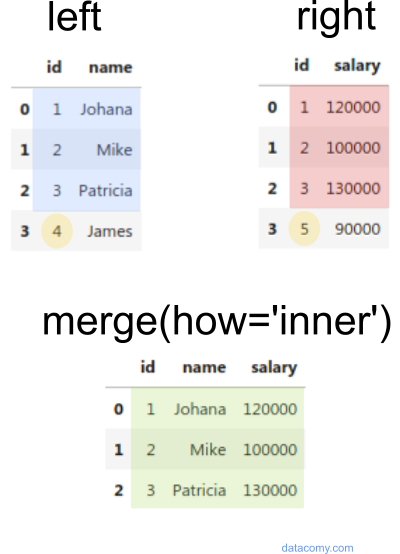

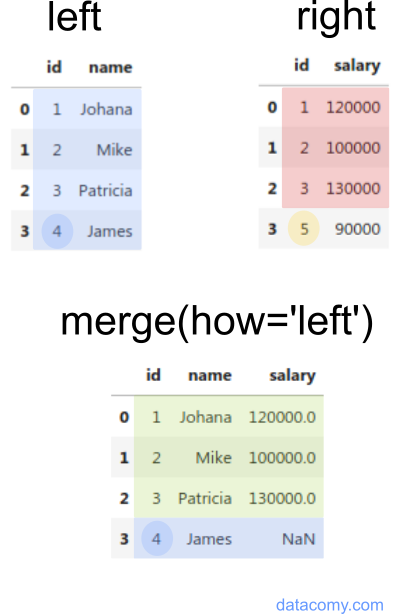

In [83]:
features = df.copy()
features.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4


- cabin 의 등장 빈도수를 특성로 추가하고 싶다면??

In [84]:
tmp = df["cabin"].value_counts().reset_index()
tmp

,cabin,count
0,UNK,706
1,B57 B59 B63 B66,4
2,G6,4
3,C101,3
4,A34,3
...,...,...
141,B73,1
142,D43,1
143,E17,1
144,B26,1


In [85]:
tmp.columns = ["cabin", "cabin_cnt"]
tmp

,cabin,cabin_cnt
0,UNK,706
1,B57 B59 B63 B66,4
2,G6,4
3,C101,3
4,A34,3
...,...,...
141,B73,1
142,D43,1
143,E17,1
144,B26,1


- merge 하기

In [86]:
tmp

,cabin,cabin_cnt
0,UNK,706
1,B57 B59 B63 B66,4
2,G6,4
3,C101,3
4,A34,3
...,...,...
141,B73,1
142,D43,1
143,E17,1
144,B26,1


In [87]:
features = pd.merge(features, tmp, how = "left", on = "cabin")
features

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range,cabin_cnt
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7,706
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3,706
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2,706
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1,706
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3,1
912,518,0,3,"Ryan, Mr. Patrick",male,29,0,0,371110,24.1500,UNK,Q,2,706
913,664,0,3,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,UNK,S,3,706
914,109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,UNK,S,3,706


- merge 의 기준이 되는 컬럼명이 다수인 경우

In [88]:
# 각 탑승 항구에서 pclass 별 운임료의 평균, 티켓번호의 다양성
agg_dict = {
    "fare": [( "embarked_pclass_fare_mean","mean")],
    "ticket" : [("embarked_pclass_ticket_nunique","nunique")]
}
gb_cols = ["embarked", "pclass"]
tmp = df.groupby(gb_cols).agg(agg_dict).reset_index()
# tmp = tmp.rename(columns = {"fare": "embarked_pclass_fare_mean", "ticket": "embarked_pclass_ticket_nunique"})
tmp

,embarked,pclass,fare,ticket
,,,embarked_pclass_fare_mean,embarked_pclass_ticket_nunique
0,C,1,115.168815,62
1,C,2,25.874475,12
2,C,3,10.536238,59
3,Q,2,11.939575,4
4,Q,3,11.121098,69
5,S,1,70.298032,87
6,S,2,21.165286,130
7,S,3,14.777677,270


In [89]:
# 각 탑승 항구에서 pclass 별 운임료의 평균, 티켓번호의 다양성
agg_dict = {
    "fare": [( "embarked_pclass_fare_mean","mean")],
    "ticket" : [("embarked_pclass_ticket_nunique","nunique")]
}
gb_cols = ["embarked", "pclass"]
tmp = df.groupby(gb_cols).agg(agg_dict)
tmp.columns=tmp.columns.droplevel()
# tmp = tmp.rename(columns = {"fare": "embarked_pclass_fare_mean", "ticket": "embarked_pclass_ticket_nunique"})
tmp

embarked_pclass_fare_mean  embarked_pclass_ticket_nunique
embarked pclass                                                           
C        1                      115.168815                              62
         2                       25.874475                              12
         3                       10.536238                              59
Q        2                       11.939575                               4
         3                       11.121098                              69
S        1                       70.298032                              87
         2                       21.165286                             130
         3                       14.777677                             270

In [90]:
agg_dict = {
    "fare": [("embarked_pclass_fare_mean", "mean")],
    "ticket": [("embarked_pclass_ticket_nunique", "nunique")]
}
gb_cols = ["embarked", "pclass"]
tmp = df.groupby(gb_cols).agg(agg_dict)
tmp.columns

MultiIndex([(  'fare',      'embarked_pclass_fare_mean'),
            ('ticket', 'embarked_pclass_ticket_nunique')],
           )

In [91]:
tmp

fare                         ticket
                embarked_pclass_fare_mean embarked_pclass_ticket_nunique
embarked pclass                                                         
C        1                     115.168815                             62
         2                      25.874475                             12
         3                      10.536238                             59
Q        2                      11.939575                              4
         3                      11.121098                             69
S        1                      70.298032                             87
         2                      21.165286                            130
         3                      14.777677                            270

In [92]:
[col for col in tmp.columns]

[('fare', 'embarked_pclass_fare_mean'),
 ('ticket', 'embarked_pclass_ticket_nunique')]

In [93]:
agg_dict = {
    "fare": [("embarked_pclass_fare_mean", "mean")],
    "ticket": [("embarked_pclass_ticket_nunique", "nunique")]
}
gb_cols = ["embarked", "pclass"]
tmp = df.groupby(gb_cols).agg(agg_dict)

# 열 이름 정리
tmp.columns = [col[1] for col in tmp.columns]

# 결과 출력
tmp


embarked_pclass_fare_mean  embarked_pclass_ticket_nunique
embarked pclass                                                           
C        1                      115.168815                              62
         2                       25.874475                              12
         3                       10.536238                              59
Q        2                       11.939575                               4
         3                       11.121098                              69
S        1                       70.298032                              87
         2                       21.165286                             130
         3                       14.777677                             270

In [94]:
features = pd.merge(features, tmp, how="left", on = ["embarked","pclass"])
features

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range,cabin_cnt,embarked_pclass_fare_mean,embarked_pclass_ticket_nunique
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7,706,115.168815,62
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3,706,14.777677,270
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2,706,14.777677,270
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1,706,21.165286,130
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4,1,70.298032,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3,1,115.168815,62
912,518,0,3,"Ryan, Mr. Patrick",male,29,0,0,371110,24.1500,UNK,Q,2,706,11.121098,69
913,664,0,3,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,UNK,S,3,706,14.777677,270
914,109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,UNK,S,3,706,14.777677,270


# apply 메서드 사용해보기
- series 또는 DataFrame에 단순한 집계가 아닌 구체적인 로직을 적용하고 싶을 때 활용
- 각 데이터에서 조건 검사 등과 같은 복잡한 처리가 가능
- 어떠한 처리를 하는 함수를 콜백함수 형태로 전달 해주면 됨

In [95]:
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4


- 탑승 항구별 sibsp와 parch의 합의 평균을 집계하고 싶다면?

In [96]:
def do_apply(x):
    x = x["sibsp"] + x["parch"]
    return x.mean()

In [97]:
df.groupby("embarked").apply(do_apply)

embarked
C    0.698925
Q    0.571429
S    0.958204
dtype: float64

## apply 경우는 apply에 대상이되는 데이터의 구조에 따라 다르게 처리되고 축 개념이 있다.

## Series apply
- 축 개념이 없고 한 행씩 처리후 결합해서 반환

In [98]:
df["gender"].apply( lambda x : 1 if x == "male" else 0 )

0      1
1      1
2      1
3      0
4      1
      ..
911    1
912    1
913    1
914    1
915    1
Name: gender, Length: 916, dtype: int64

## DataFrame apply
- 축 개념이 있다.
- axis = 0 : 행방향, 컬럼단위로 처리 (기본값)
- axis = 1 : 열방향, 행단위로 처리

In [99]:
def do_apply(x):
    print(x.shape)
    return x.head()

df.apply(do_apply,axis=0)

(916,)
(916,)
(916,)
(916,)
(916,)
(916,)
(916,)
(916,)
(916,)
(916,)
(916,)
(916,)
(916,)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4


In [100]:
def do_apply(x):
    display(x)
    print("=" * 50)

df.iloc[:5].apply(do_apply, axis=1)

passengerid                        494
survived                             0
pclass                               1
name           Artagaveytia, Mr. Ramon
gender                            male
age                                 71
sibsp                                0
parch                                0
ticket                        PC 17609
fare                           49.5042
cabin                              UNK
embarked                             C
age_range                            7
Name: 0, dtype: object

passengerid                    462
survived                         0
pclass                           3
name           Morley, Mr. William
gender                        male
age                             34
sibsp                            0
parch                            0
ticket                      364506
fare                          8.05
cabin                          UNK
embarked                         S
age_range                        3
Name: 1, dtype: object

passengerid                        1286
survived                              0
pclass                                3
name           Kink-Heilmann, Mr. Anton
gender                             male
age                                  29
sibsp                                 3
parch                                 1
ticket                           315153
fare                             22.025
cabin                               UNK
embarked                              S
age_range                             2
Name: 2, dtype: object

passengerid                     1130
survived                           1
pclass                             2
name           Hiltunen, Miss. Marta
gender                        female
age                               18
sibsp                              1
parch                              1
ticket                        250650
fare                            13.0
cabin                            UNK
embarked                           S
age_range                          1
Name: 3, dtype: object

passengerid                    461
survived                         1
pclass                           1
name           Anderson, Mr. Harry
gender                        male
age                             48
sibsp                            0
parch                            0
ticket                       19952
fare                         26.55
cabin                          E12
embarked                         S
age_range                        4
Name: 4, dtype: object

0    None
1    None
2    None
3    None
4    None
dtype: object

## groupby apply
- 축 개념이 없다!

In [101]:
def do_apply(x):
    display(x)
    print("=" * 50)

df.groupby("embarked").apply(do_apply)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
9,119,0,1,"Baxter, Mr. Quigg Edmond",male,24,0,1,PC 17558,247.5208,B58 B60,C,2
22,97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,7
27,525,0,3,"Kassem, Mr. Fared",male,29,0,0,2700,7.2292,UNK,C,2
30,1175,1,3,"Touma, Miss. Maria Youssef",female,9,1,1,2650,15.2458,UNK,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25,1,2,SC/Paris 2123,41.5792,UNK,C,2
888,642,1,1,"Sagesser, Mlle. Emma",female,24,0,0,PC 17477,69.3000,B35,C,2
895,66,1,3,"Moubarek, Master. Gerios",male,29,1,1,2661,15.2458,UNK,C,2
899,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54,1,0,36947,78.2667,D20,C,5


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
7,331,1,3,"McCoy, Miss. Agnes",female,29,2,0,367226,23.2500,UNK,Q,2
16,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,29,1,0,367230,15.5000,UNK,Q,2
44,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.7500,UNK,Q,3
65,369,1,3,"Jermyn, Miss. Annie",female,29,0,0,14313,7.7500,UNK,Q,2
70,1075,0,3,"Lane, Mr. Patrick",male,29,0,0,7935,7.7500,UNK,Q,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,UNK,Q,3
849,302,1,3,"McCoy, Mr. Bernard",male,29,2,0,367226,23.2500,UNK,Q,2
868,627,0,2,"Kirkland, Rev. Charles Leonard",male,57,0,0,219533,12.3500,UNK,Q,5
890,704,0,3,"Gallagher, Mr. Martin",male,25,0,0,36864,7.7417,UNK,Q,2


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4
5,952,0,3,"Dika, Mr. Mirko",male,17,0,0,349232,7.8958,UNK,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,1086,0,2,"Drew, Master. Marshall Brines",male,8,0,2,28220,32.5000,UNK,S,0
910,535,0,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,UNK,S,3
913,664,0,3,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,UNK,S,3
914,109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,UNK,S,3


""


## 콜백함수에 추가 인수를 전달하고 싶다면?

In [102]:
age_mean = df["age"].mean()
age_mean

29.71069868995633

In [103]:
def do_apply(x, age_mean):
    return x["age"].mean() - age_mean

In [104]:
df.groupby("embarked").apply(do_apply, age_mean = age_mean)

embarked
C    1.757043
Q   -0.805937
S   -0.401101
dtype: float64

# pandas 에서 progress bar 사용하기

In [105]:
from tqdm.notebook import tqdm

In [106]:
for i in tqdm(range(1000000)):
    pass

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [107]:
tqdm.pandas()

In [108]:
import time
def do_apply(x):
    time.sleep(0.01)
    return x

df.progress_apply(do_apply,axis=1)

  0%|          | 0/916 [00:00<?, ?it/s]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_range
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,UNK,C,7
1,462,0,3,"Morley, Mr. William",male,34,0,0,364506,8.0500,UNK,S,3
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22.0250,UNK,S,2
3,1130,1,2,"Hiltunen, Miss. Marta",female,18,1,1,250650,13.0000,UNK,S,1
4,461,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3
912,518,0,3,"Ryan, Mr. Patrick",male,29,0,0,371110,24.1500,UNK,Q,2
913,664,0,3,"Coleff, Mr. Peju",male,36,0,0,349210,7.4958,UNK,S,3
914,109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,UNK,S,3
